## Import TensorFlow and other libraries

It's good practice to use a validation split when developing your model. Let's use 80% of the images for training, and 20% for validation.

Class Names: ['CDM', 'HT', 'MDMV', 'NCLB', 'SCLB', 'SCMV', 'SR']


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_2 (Rescaling)         │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 224, 224, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 112, 112, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 112, 112, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 56, 56, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 56, 56, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     6,422,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,447,144 (24.59 MB)

 Trainable params: 6,447,143 (24.59 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1 (8.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Prediction results for the single image:
            CDM        HT      MDMV          NCLB          SCLB          SCMV  \
0  1.436629e-09  0.000001  0.999999  6.014099e-11  3.147819e-08  5.201563e-11   

             SR  
0  5.278460e-15  

True Label: MDMV
Predicted Label: MDMV
Prediction Confidence: 1.0000
Confusion Matrix:

      CDM  HT  MDMV  NCLB  SCLB  SCMV  SR
CDM     0   0     0     0     0     0   0
HT      0   0     0     0     0     0   0
MDMV    0   0     1     0     0     0   0
NCLB    0   0     0     0     0     0   0
SCLB    0   0     0     0     0     0   0
SCMV    0   0     0     0     0     0   0
SR      0   0     0     0     0     0   0

Precision, Recall, and F1-Score for the class:
      Precision  Recall  F1-Score
CDM         0.0     0.0       0.0
HT          0.0     0.0       0.0
MDMV        1.0     1.0       1.0
NCLB        0.0     0.0       0.0
SCLB        0.0     0.0       0.0
SCMV        0.0     0.0       0.0
SR         

c:\Users\somnu\anaconda3\envs\deep\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\somnu\anaconda3\envs\deep\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\somnu\anaconda3\envs\deep\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


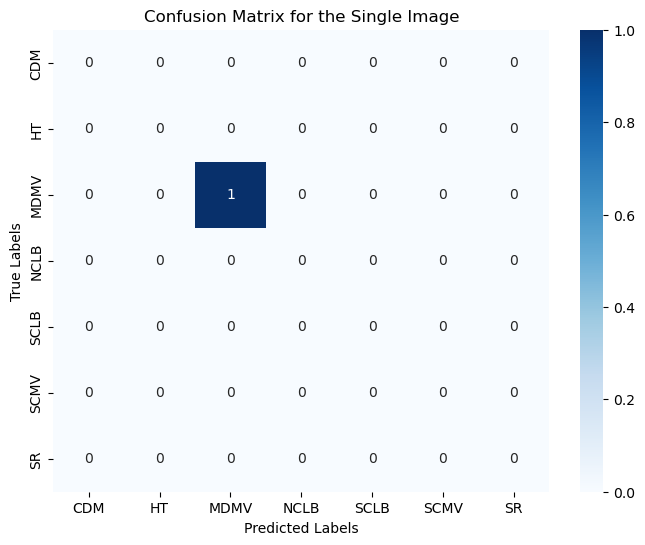

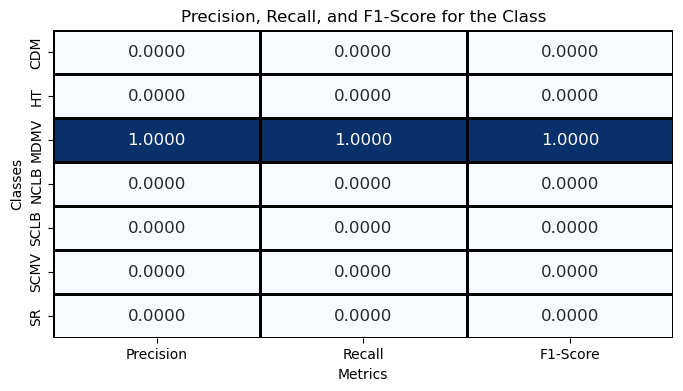

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from tensorflow.keras.preprocessing import image

#----------------------------------------------------------------------------------------------------------------
batch_size = 32
img_height = 224
img_width = 224
#----------------------------------------------------------------------------------------------------------------
# Path to a single image file
# img_path = "D:/CNN-With/data/CDM/CDMls206 - Copy - Copy.jpg"
# img_path = "D:/CNN-With/data/HT/ht206 - Copy - Copy.jpg"
img_path = "D:/CNN-With/data/MDMV/MDMVls1 - Copy (2).jpg"
# img_path = "D:/CNN-With/data/NCLB/NCLBls1 - Copy (2).jpg"
# img_path = "D:/CNN-With/data/SCLB/SCLBls1 - Copy.jpg"
# img_path = "D:/CNN-With/data/SCMV/SCMVls1 - Copy.jpg"
# img_path = "D:/CNN-With/data/SR/SRls1 - Copy - Copy.jpg"

# Load the image and resize it
img = image.load_img(img_path, target_size=(img_height, img_width))

# Convert the image to a numpy array
img_array = image.img_to_array(img)

# Add batch dimension (since the model expects batches)
img_array = tf.expand_dims(img_array, axis=0)

# Normalize the image (if the model requires it, adjust as needed)
# img_array = img_array / 255.0  # If your model was trained with normalized images

#----------------------------------------------------------------------------------------------------------------
class_names = ['CDM', 'HT', 'MDMV', 'NCLB', 'SCLB', 'SCMV', 'SR']  # Class names for the single image
print("Class Names:", class_names)
#----------------------------------------------------------------------------------------------------------------

# Define the path where the model is saved (in H5 format)
saved_model_path = "D:/CNN-With/Trained_Model_Cnn/model.h5"

# Load the model
model = tf.keras.models.load_model(saved_model_path)

# Print the model summary
model.summary()
#----------------------------------------------------------------------------------------------------------------

# Predict using the loaded model
predictions = model.predict(img_array)

# If the model has logits as output, apply softmax
if 'from_logits' in model.loss.get_config() and model.loss.get_config()['from_logits']:
    predictions = tf.nn.softmax(predictions).numpy()

# Create a DataFrame to show the prediction probabilities
pred_df = pd.DataFrame(predictions, columns=class_names)

# Display the prediction results
print("Prediction results for the single image:")
print(pred_df)

# Assuming that the true label for the image is known
# For single image, you can manually set the true label
# true_label = ["CDM"]  # Replace with actual label for the image if available
# true_label = ["HT"]  # Replace with actual label for the image if available
true_label = ["MDMV"]  # Replace with actual label for the image if available
# true_label = ["NCLB"]  # Replace with actual label for the image if available
# true_label = ["SCLB"]  # Replace with actual label for the image if available
# true_label = ["SCMV"]  # Replace with actual label for the image if available
# true_label = ["SR"]  # Replace with actual label for the image if available
predicted_label = pred_df.idxmax(axis=1).iloc[0]  # Get the predicted label for the image
confidence = pred_df.max(axis=1).iloc[0]  # Get the confidence of the prediction

# Print the predicted label and confidence
print(f"\nTrue Label: {true_label[0]}")
print(f"Predicted Label: {predicted_label}")
print(f"Prediction Confidence: {confidence:.4f}")

#----------------------------------------------------------------------------------------------------------------
# Create confusion matrix for the single image (if you have ground truth label)
cm = confusion_matrix(true_label, [predicted_label], labels=class_names)

# Convert confusion matrix to DataFrame for better readability
cm_df = pd.DataFrame(cm, index=class_names, columns=class_names)

# Print the confusion matrix
print("Confusion Matrix:\n")
print(cm_df)

# Calculate Precision, Recall, and F1-Score (for single sample, it's a bit limited)
precision = precision_score(true_label, [predicted_label], average=None, labels=class_names)
recall = recall_score(true_label, [predicted_label], average=None, labels=class_names)
f1 = f1_score(true_label, [predicted_label], average=None, labels=class_names)

# Display metrics
metrics_df = pd.DataFrame({
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1
}, index=class_names)

print("\nPrecision, Recall, and F1-Score for the class:")
print(metrics_df)

# Optionally, calculate average precision, recall, and F1-Score for single image
average_precision = precision_score(true_label, [predicted_label], average='macro')
average_recall = recall_score(true_label, [predicted_label], average='macro')
average_f1 = f1_score(true_label, [predicted_label], average='macro')

print(f"\nAverage Precision: {average_precision:.4f}")
print(f"Average Recall: {average_recall:.4f}")
print(f"Average F1-Score: {average_f1:.4f}")

#----------------------------------------------------------------------------------------------------------------
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix for the Single Image')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Plotting the metrics table as a heatmap (similar to confusion matrix)
plt.figure(figsize=(8, 4))
sns.heatmap(metrics_df, annot=True, fmt='.4f', cmap='Blues', cbar=False, annot_kws={"size": 12},
            xticklabels=metrics_df.columns, yticklabels=metrics_df.index, linewidths=1, linecolor='black')
plt.title("Precision, Recall, and F1-Score for the Class")
plt.xlabel('Metrics')
plt.ylabel('Classes')
plt.show()